## Sentiment Analysis 

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import contractions

# Load your dataset into a pandas DataFrame
data = pd.read_excel('C:/Users/Rupesh/datafiltering.xlsx')  
# Data preprocessing steps
def preprocess_text(text):
    if not text.isascii():
        return ""  # Exclude non-English text
    text = contractions.fix(text)
    text = text.lower()

    # Remove punctuation and non-alphanumeric characters
    text = ' '.join(word for word in word_tokenize(text) if word.isalnum())

    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)

    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(text))

    return text

# Apply preprocessing to all news articles
data['cleaned_news'] = data['news'].apply(preprocess_text)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group cleaned news articles by date and apply custom aggregation
grouped_data = data.groupby('Date')['cleaned_news'].apply(' '.join).reset_index()

# Apply sentiment analysis to the cleaned news for each date
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

grouped_data['sentiment'] = grouped_data['cleaned_news'].apply(analyze_sentiment)

# Categorize sentiments as positive, negative, or neutral based on polarity thresholds
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

grouped_data['sentiment_label'] = grouped_data['sentiment'].apply(categorize_sentiment)

# Print the DataFrame with the 'Date', 'sentiment_label', 'sentiment', and 'cleaned_news' columns
print(grouped_data[['Date', 'sentiment_label', 'sentiment','cleaned_news']])



          Date sentiment_label  sentiment  \
0   2022-08-26        Positive   0.010963   
1   2022-08-27         Neutral   0.000000   
2   2022-08-28        Positive   0.675000   
3   2022-08-29        Positive   0.048472   
4   2022-08-30        Positive   0.111710   
..         ...             ...        ...   
332 2023-08-21        Positive   0.057339   
333 2023-08-22        Negative  -0.056111   
334 2023-08-23        Positive   0.024183   
335 2023-08-24        Positive   0.125102   
336 2023-08-25        Positive   0.034025   

                                          cleaned_news  
0    market wrap bitcoin slump lowest level month p...  
1                                                       
2    inflation hedge bitcoin true value separation ...  
3    first mover america bitcoin bounce dollar rece...  
4    rug pull protect getting rugged crypto project...  
..                                                 ...  
332  federal reserve bias tightening could put pres...  
333

## Text Exploratory Analysis

### Visualizing the most frequent words

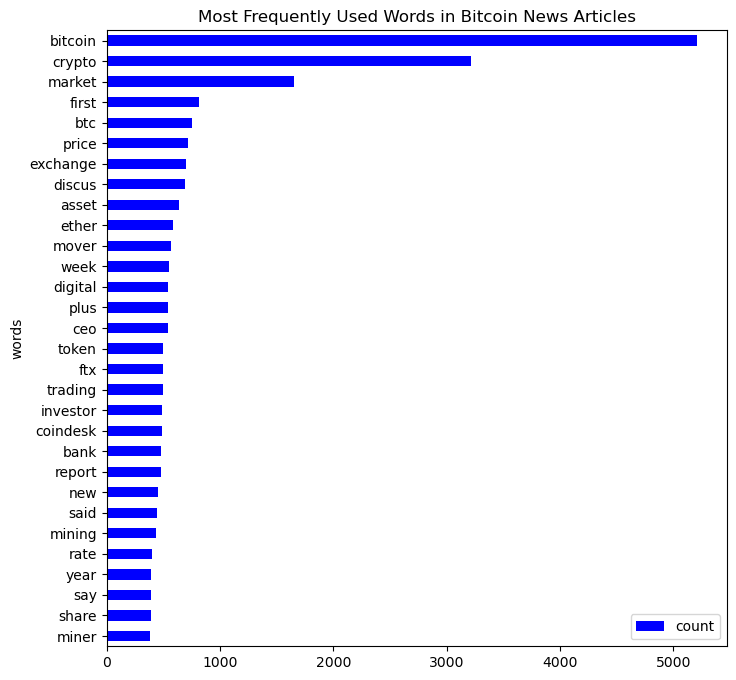

In [3]:
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data contains the 'cleaned_news' column
lemmatized_tokens = [text.split() for text in grouped_data['cleaned_news']]
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_news_words = pd.DataFrame(counts_no.most_common(30),
                                columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
clean_news_words.sort_values(by='count').plot.barh(x='words',
                                                   y='count',
                                                   ax=ax,
                                                   color="blue")
ax.set_title("Most Frequently Used Words in Bitcoin News Articles")
plt.show()


### WordCloud

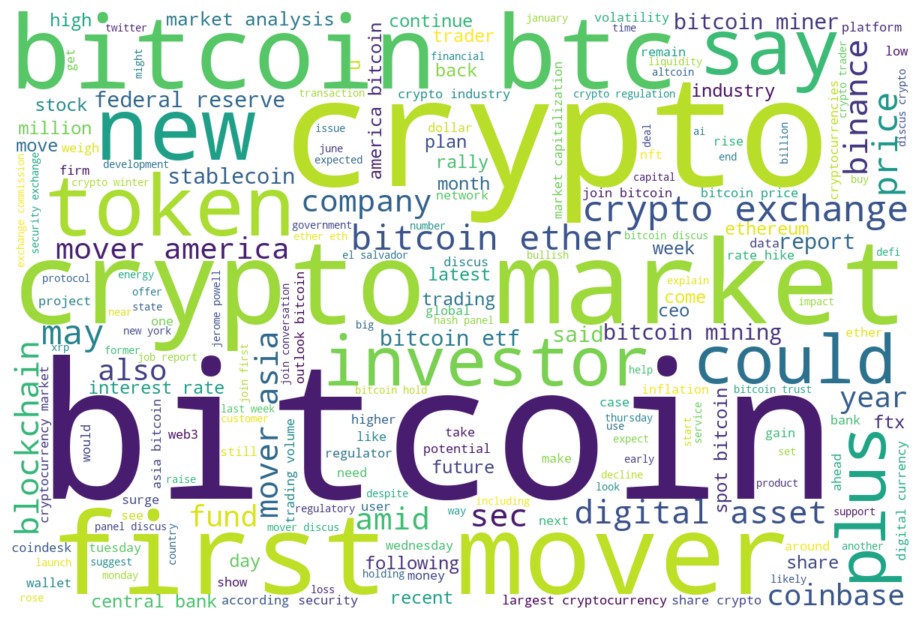

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud



# Combine all cleaned news articles into a single string
all_cleaned_news = ' '.join(article for article in grouped_data['cleaned_news'])

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Create a WordCloud
wordcloud = WordCloud(width=1200, height=800,
                      background_color='white',
                      stopwords=stop_words,
                      min_font_size=10).generate(all_cleaned_news)

# Display the WordCloud
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


### Sentiment Trend Over Time

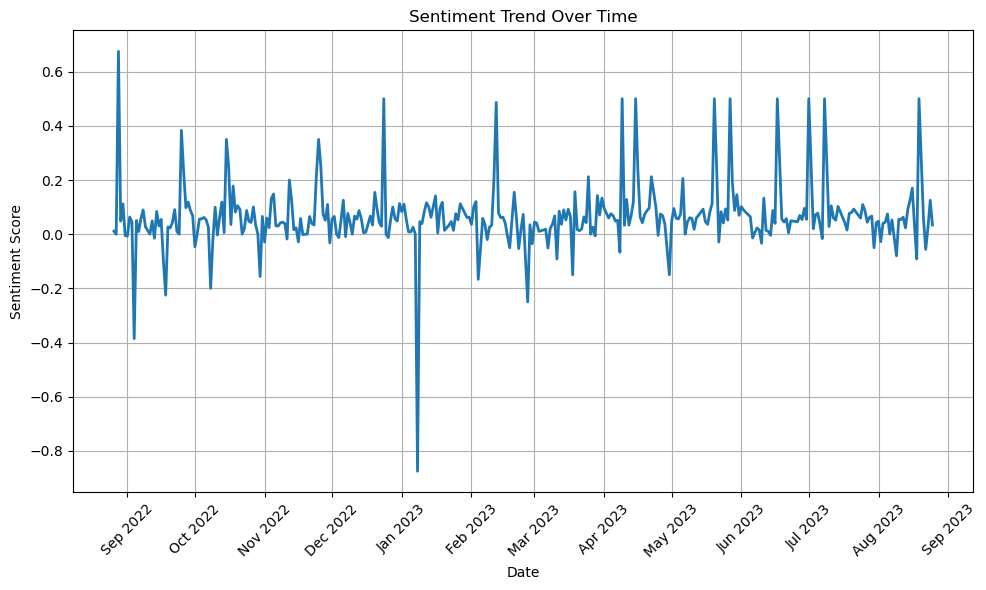

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Plotting sentiment trend over time with month labels
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Date'], grouped_data['sentiment'], linewidth=2)
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)

# Format x-axis labels to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate labels for better visibility

plt.tight_layout()
plt.show()


### Distribution of Sentiments

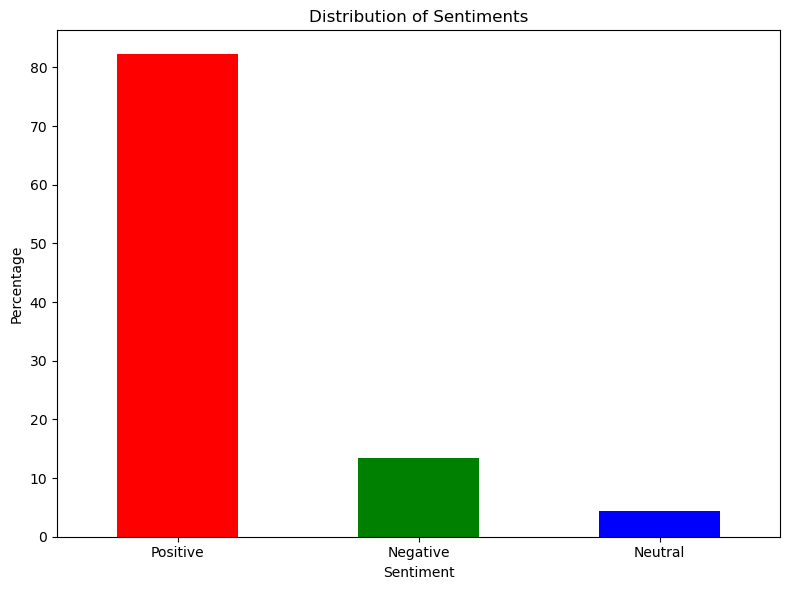

In [26]:
import matplotlib.pyplot as plt

# Count the number of each sentiment label
sentiment_counts = grouped_data['sentiment_label'].value_counts()

# Calculate the percentage distribution
total_samples = len(grouped_data)
percentage_distribution = (sentiment_counts / total_samples) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
percentage_distribution.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
